In [1]:
# Set up simple CNN for MNIST hand-written digits image recognition
#import the necessary libraries 
%matplotlib inline

import tensorflow as tf 
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist

7


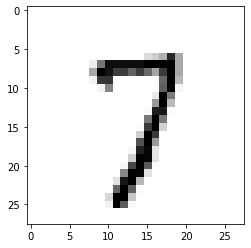

In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

image_index = 258 # You may select anything up to 60,000
print(y_train[image_index]) # The label 
plt.imshow(x_train[image_index], cmap='Greys')

In [4]:
#check the shape of the imput elements

x_train.shape

(60000, 28, 28)

In [5]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [6]:

# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [7]:
# Creating a Sequential Model and adding the layers
#layerconv = Conv2D(28, kernel_size=(3,3), input_shape=input_shape)
#print(layerconv.kernel)
#print(layerconv.kernel_initializer.seed)
#print("*******")
#layerconv = Dropout(0.2)
#print(layerconv.strides)
#print(layerconv.kernel_initializer)


model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [8]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(x=x_train,y=y_train, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3726 - accuracy: 0.8840
Epoch 2/100
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1354 - accuracy: 0.9586
Epoch 3/100
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0988 - accuracy: 0.9687
Epoch 4/100
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0798 - accuracy: 0.9750
Epoch 5/100
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0696 - accuracy: 0.9780
Epoch 6/100
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0585 - accuracy: 0.9806
Epoch 7/100
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0551 - accuracy: 0.9819
Epoch 8/100
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0480 - accuracy: 0.9841
Epoch 9/100
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0426 - accuracy: 0.9856
Epoch 10/100
1875/1875 [==============================]

1875/1875 [==============================] - 34s 18ms/step - loss: 0.0162 - accuracy: 0.9958
Epoch 79/100
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0191 - accuracy: 0.9947
Epoch 80/100
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0166 - accuracy: 0.9956
Epoch 81/100
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0200 - accuracy: 0.9945
Epoch 82/100
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0232 - accuracy: 0.9948
Epoch 83/100
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0220 - accuracy: 0.9946
Epoch 84/100
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0195 - accuracy: 0.9951
Epoch 85/100
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0205 - accuracy: 0.9947
Epoch 86/100
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0201 - accuracy: 0.9950
Epoch 87/100
1875/1875 [==============================] - 3

In [9]:
#Code to get the output of network layers

inp = model.input                                           # input placeholder
outputs = [layer.output for layer in model.layers]          # all layer outputs
functors = [K.function([inp], [out]) for out in outputs]    # evaluation functions

# Testing
test = np.random.random(input_shape)[np.newaxis,...]
layer_outs = [func([test]) for func in functors]
#print(layer_outs)
print(layer_outs[0][0][0][0][0])

[ 0.03605749  0.02673386  0.09576613  0.03316665  0.02306511  0.04541779
  0.07123407  0.13621314  0.1831839  -0.03319888  0.12234488  0.02825435
 -0.10022432 -0.03212563 -0.08069938  0.03122469 -0.41679722  0.06686698
  0.28170347 -0.2552995  -0.12982427 -0.15488222  0.05613678  0.1130937
  0.11945851 -0.13711914  0.09254491 -0.05161443]


In [10]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3259 - accuracy: 0.9766


[0.3259474039077759, 0.9765999913215637]

5


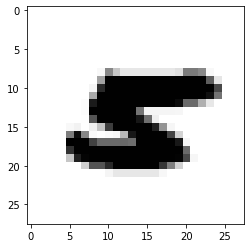

In [11]:
image_index = 7850
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [12]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('modelno100.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp46z5dby8/assets
